**Yasser Zaher 202201077**

paper: Predictive Modeling for Breast Cancer Classification in the Context of Bangladeshi Patients: A Supervised Machine Learning Approach with Explainable AI


# EDA

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [56]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/breast-cancer-wisconsin-data


In [57]:
data = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

In [58]:
data.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [59]:
data = data.drop('Unnamed: 32', axis=1)

data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [60]:
data.isna().sum()


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [61]:
#Encoding the target column
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

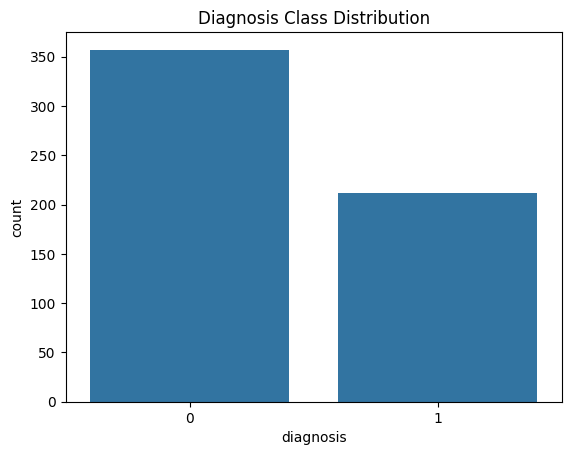

In [62]:
# Check class distribution
sns.countplot(x='diagnosis', data=data)
plt.title('Diagnosis Class Distribution')
plt.show()

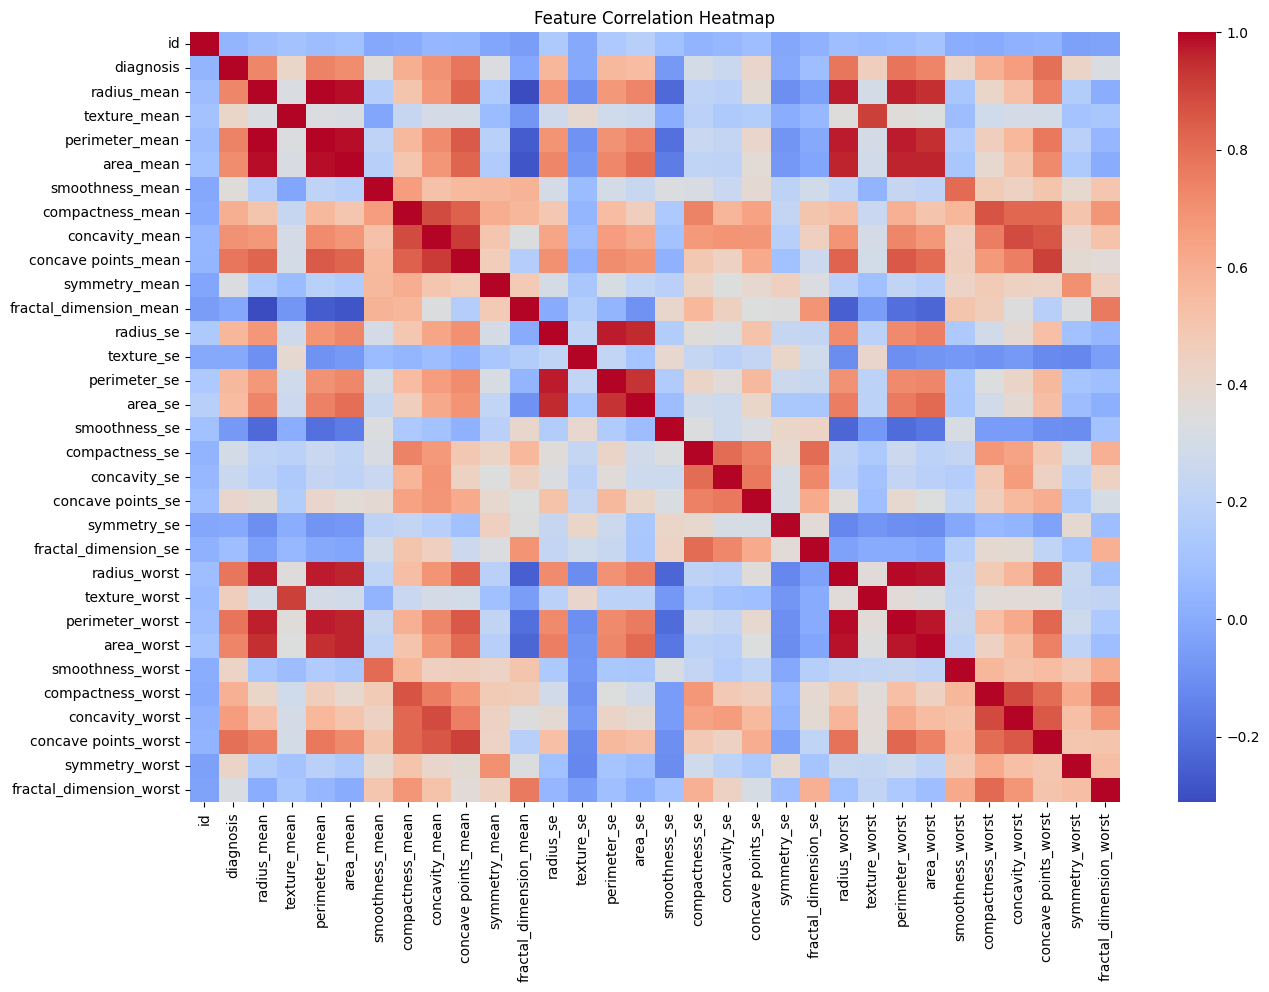

In [63]:
# Correlation heatmap
plt.figure(figsize=(15,10))
corr = data.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

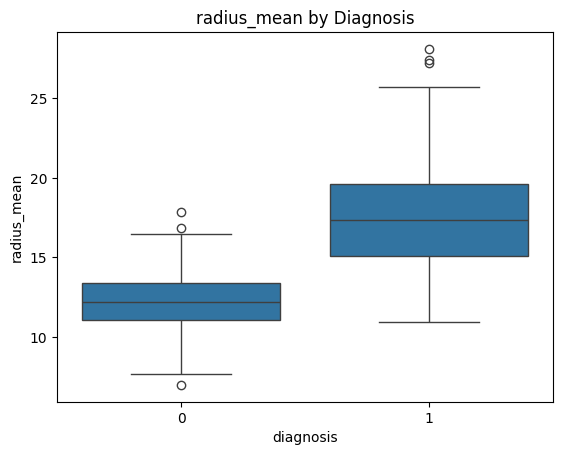

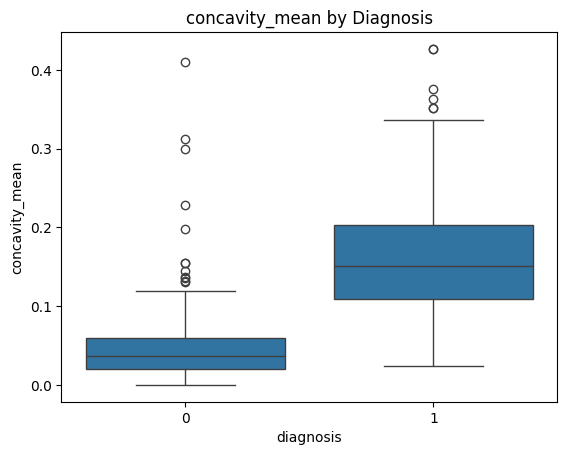

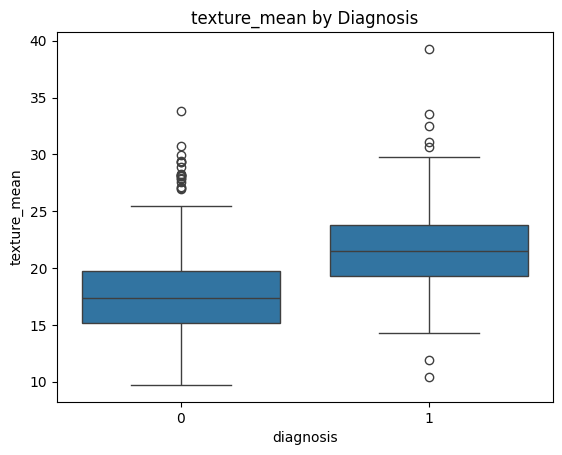

In [64]:
# Boxplots for key features


top_features = ['radius_mean', 'concavity_mean', 'texture_mean']

# melt the dataframe into a long format for easier plotting with seaborn
data_melt = pd.melt(data, id_vars=['diagnosis'], value_vars=top_features, var_name='feature', value_name='value')


import matplotlib.pyplot as plt
import seaborn as sns
top_features = ['radius_mean', 'concavity_mean', 'texture_mean']
for feature in top_features:
    sns.boxplot(x='diagnosis', y=feature, data=data)
    plt.title(f'{feature} by Diagnosis')
    plt.show()

In [65]:
print(data[top_features].dtypes)

radius_mean       float64
concavity_mean    float64
texture_mean      float64
dtype: object


In [66]:
print(data[top_features].isnull().sum())

radius_mean       0
concavity_mean    0
texture_mean      0
dtype: int64


In [67]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


# Preprocessing

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [69]:
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [71]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**bold text**# 🧠 3. Modeling – XGBoost Classifier

In [72]:
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, roc_auc_score, RocCurveDisplay)

In [73]:
model = XGBClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [74]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

In [75]:
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.9285714285714286
F1 Score: 0.9629629629629629
ROC-AUC: 0.9957010582010583


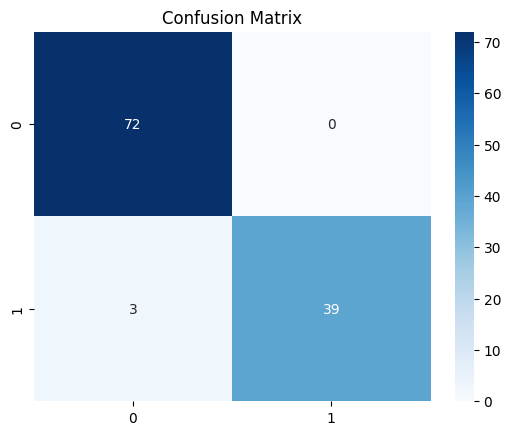

In [76]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

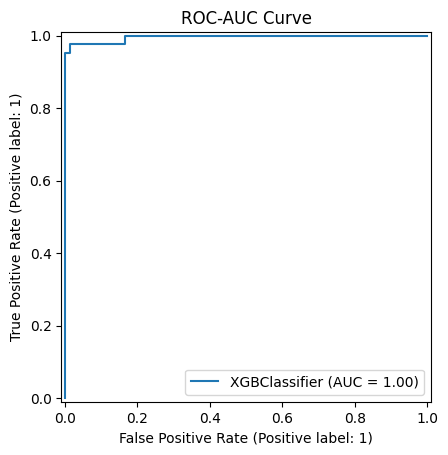

In [77]:
# ROC-AUC Curve
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title('ROC-AUC Curve')
plt.show()

In [78]:
!pip install lime

In [79]:
from lime.lime_tabular import LimeTabularExplainer

In [80]:
import numpy as np

print("Any NaNs in X_train_scaled:", np.isnan(X_train_scaled).any())
print("Any NaNs in X_test_scaled:", np.isnan(X_test_scaled).any())
print("Any Infs in X_train_scaled:", np.isinf(X_train_scaled).any())
print("Any Infs in X_test_scaled:", np.isinf(X_test_scaled).any())


Any NaNs in X_train_scaled: False
Any NaNs in X_test_scaled: False
Any Infs in X_train_scaled: False
Any Infs in X_test_scaled: False


In [81]:
cleaned_feature_names = X_train.columns[selector.get_support()]

In [82]:
# Remove columns with zero variance (which cause division by zero in StandardScaler)
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=0.0)
X_train = vt.fit_transform(X_train)
X_test = vt.transform(X_test)


In [83]:
lime_explainer = LimeTabularExplainer(X_train_scaled,
                                      feature_names=X.columns[vt.get_support()],
                                      class_names=['Benign', 'Malignant'],
                                      discretize_continuous=True)

lime_exp = lime_explainer.explain_instance(X_test_scaled[0], model.predict_proba, num_features=10)
lime_exp.show_in_notebook()


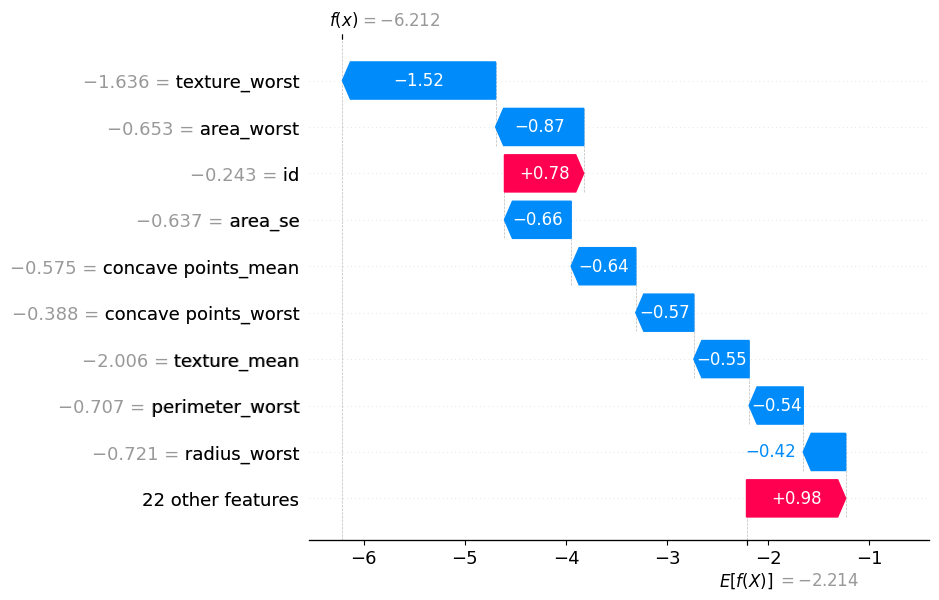

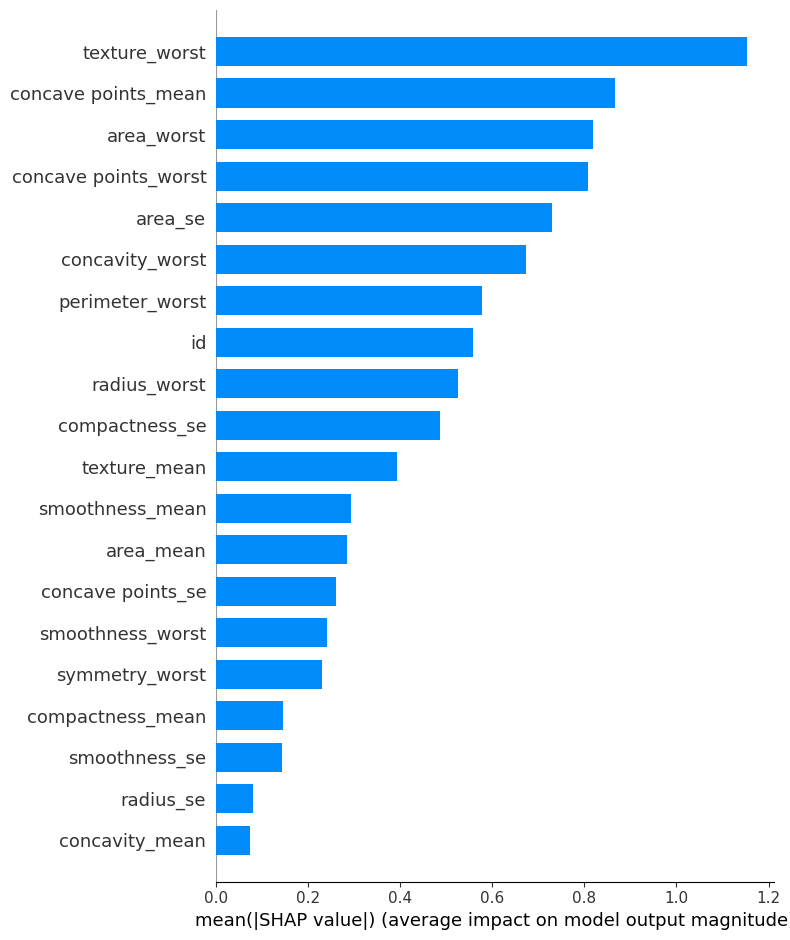

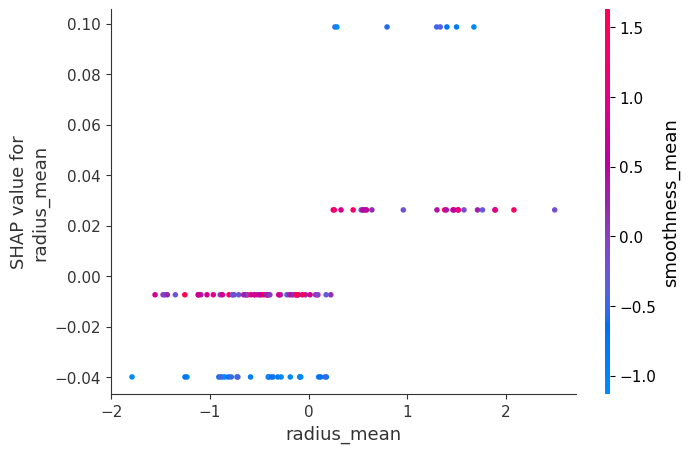

In [85]:
# prompt: import shap
# and explain using shape

!pip install shap

import shap

# Assuming 'model' and 'X_test_scaled' are defined from the previous code
# Get the feature names after VarianceThreshold
feature_names = X.columns[vt.get_support()]

explainer = shap.Explainer(model, X_test_scaled, feature_names=feature_names)
shap_values = explainer(X_test_scaled)

# Visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test_scaled, feature_names=feature_names, plot_type="bar")

# Dependence plots
# Find the index of "radius_mean" in the feature names
radius_mean_index = np.where(feature_names == "radius_mean")[0][0]

# Use the index to access the correct column for the dependence plot
shap.dependence_plot(radius_mean_index, shap_values.values, X_test_scaled, feature_names=feature_names)

In [89]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [91]:
y_pred_dt = dt_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94        72
           1       0.90      0.88      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



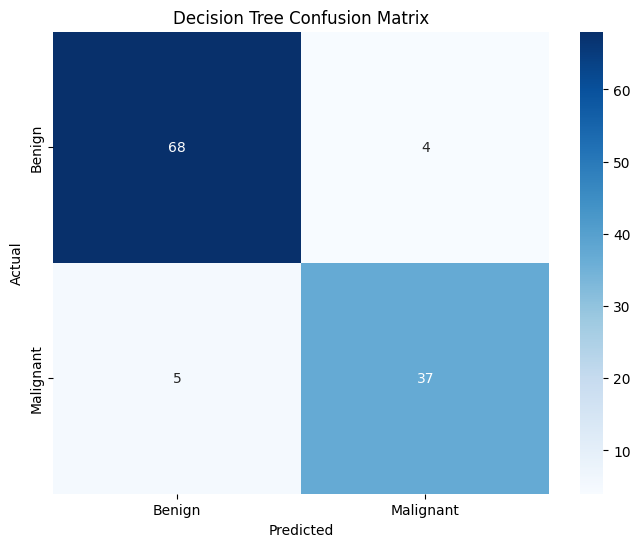

In [92]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [93]:
lime_exp_dt = lime_explainer.explain_instance(X_test_scaled[0], dt_model.predict_proba, num_features=10)
lime_exp_dt.show_in_notebook()

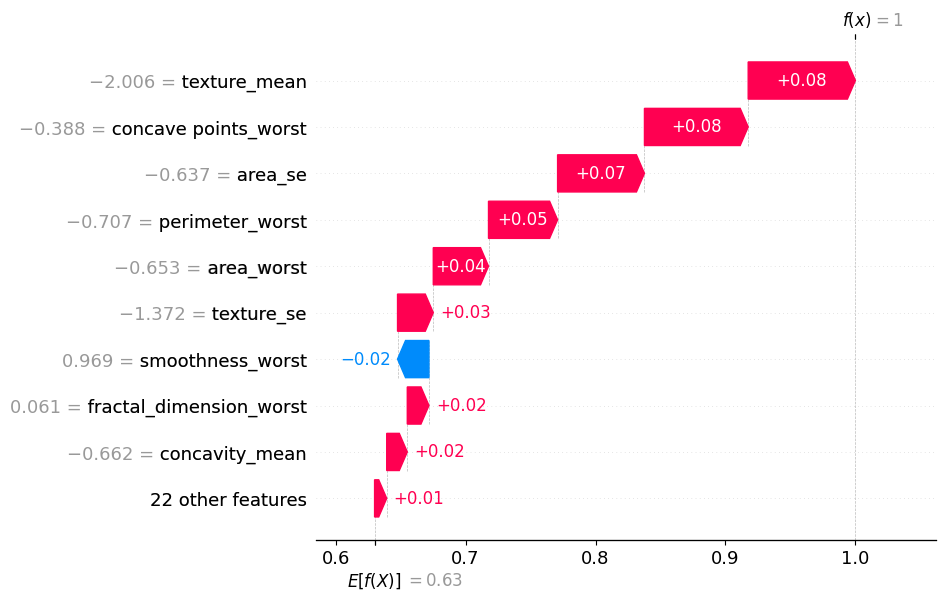

In [95]:
explainer_dt = shap.Explainer(dt_model, X_test_scaled, feature_names=feature_names)
shap_values_dt = explainer_dt(X_test_scaled)
shap.plots.waterfall(shap_values_dt[0, :, 0])

<Figure size 640x480 with 0 Axes>

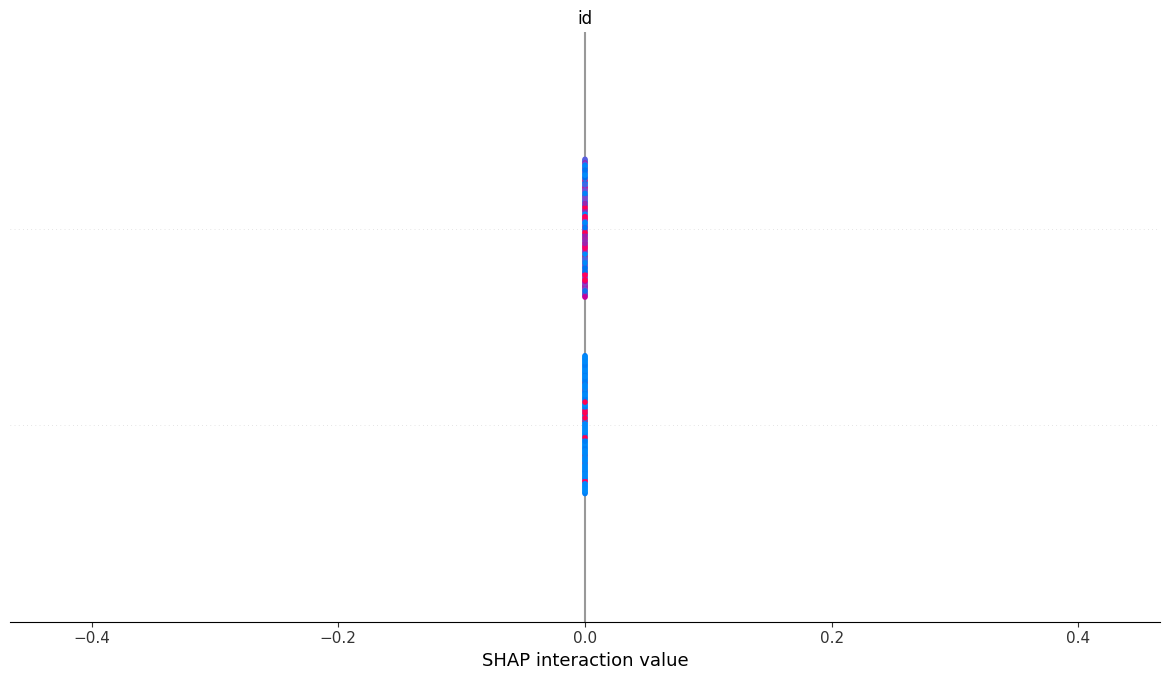

In [96]:

shap.summary_plot(shap_values_dt, X_test_scaled, feature_names=feature_names, plot_type="bar")

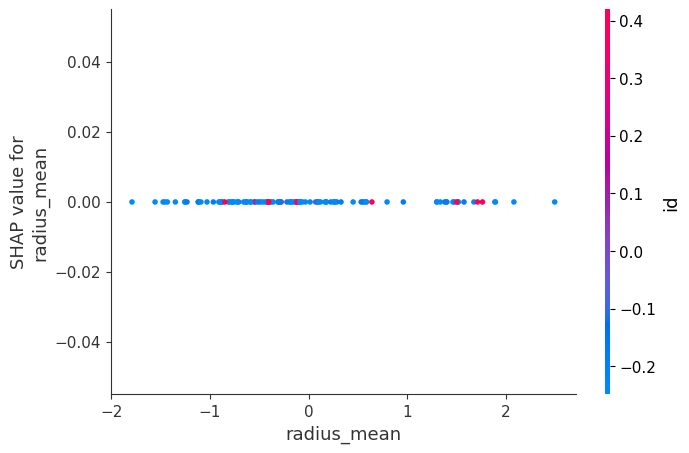

In [97]:
radius_mean_index = np.where(feature_names == "radius_mean")[0][0]
shap.dependence_plot(radius_mean_index, shap_values_dt[:, :, 0].values, X_test_scaled, feature_names=feature_names)


In [99]:
feature_importances = dt_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                    Feature  Importance
23          perimeter_worst    0.723157
28     concave points_worst    0.067700
25         smoothness_worst    0.040833
2              texture_mean    0.029151
4                 area_mean    0.022452
22            texture_worst    0.018744
24               area_worst    0.015606
27          concavity_worst    0.014335
30  fractal_dimension_worst    0.013416
12               texture_se    0.012521
7            concavity_mean    0.011269
19              symmetry_se    0.007043
29           symmetry_worst    0.006261
18        concave points_se    0.006261
8       concave points_mean    0.004696
13             perimeter_se    0.004320
14                  area_se    0.002234
9             symmetry_mean    0.000000
0                        id    0.000000
1               radius_mean    0.000000
3            perimeter_mean    0.000000
5           smoothness_mean    0.000000
6          compactness_mean    0.000000
11                radius_se    0.000000


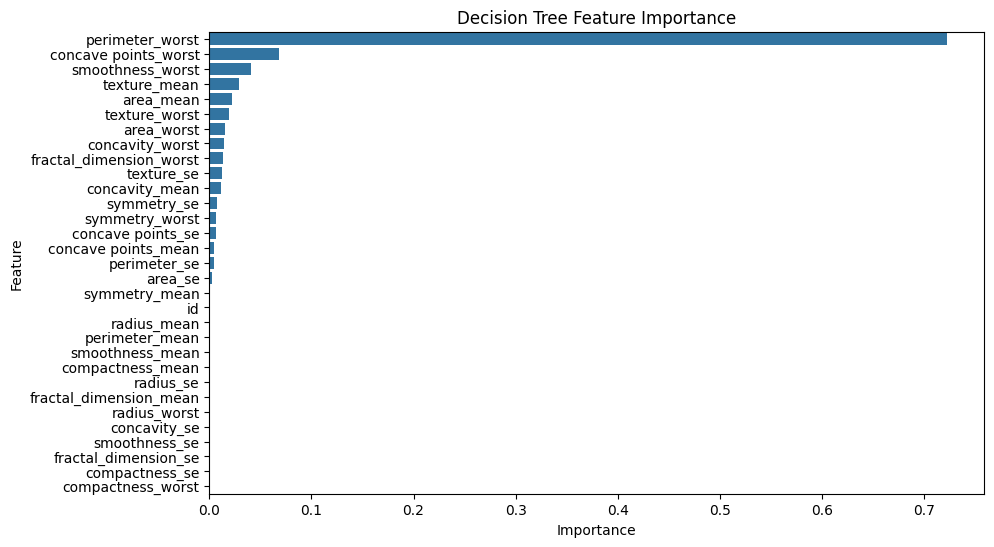

In [101]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Decision Tree Feature Importance')
plt.show()

In [102]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

In [103]:
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - Precision:", precision_score(y_test, y_pred_rf))
print("Random Forest - Recall:", recall_score(y_test, y_pred_rf))
print("Random Forest - F1 Score:", f1_score(y_test, y_pred_rf))
print("Random Forest - ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

Random Forest - Accuracy: 0.956140350877193
Random Forest - Precision: 1.0
Random Forest - Recall: 0.8809523809523809
Random Forest - F1 Score: 0.9367088607594937
Random Forest - ROC-AUC: 0.9917328042328042


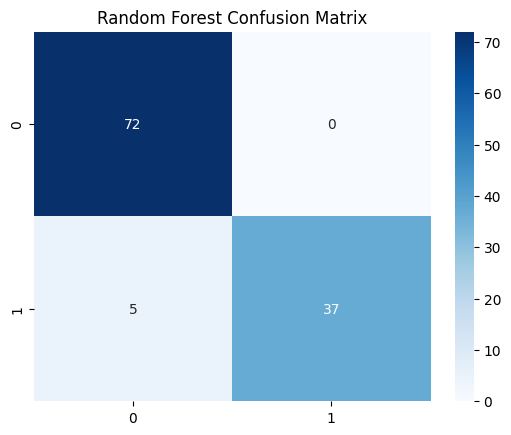

In [104]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

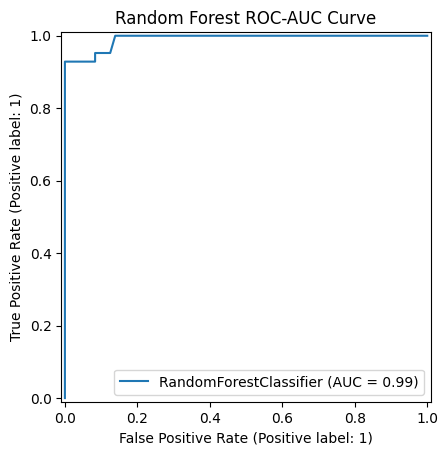

In [105]:
RocCurveDisplay.from_estimator(rf_model, X_test_scaled, y_test)
plt.title('Random Forest ROC-AUC Curve')
plt.show()

In [106]:
lime_exp_rf = lime_explainer.explain_instance(X_test_scaled[0], rf_model.predict_proba, num_features=10)
lime_exp_rf.show_in_notebook()

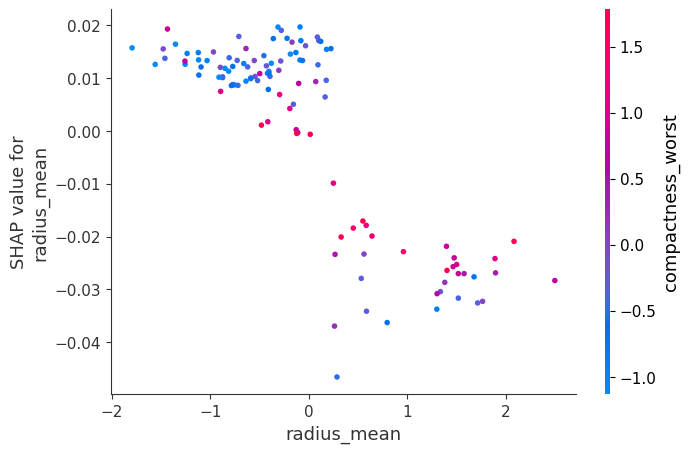

In [111]:
explainer_rf = shap.Explainer(rf_model, X_test_scaled, feature_names=feature_names)
shap_values_rf = explainer_rf(X_test_scaled)
shap_values_rf_class0 = shap_values_rf[:, :, 0]
shap_values_rf_class0_values = shap_values_rf_class0.values
shap.dependence_plot(
    radius_mean_index,
    shap_values_rf_class0_values,
    X_test_scaled,
    feature_names=feature_names,
)